In [28]:

import pandas as pd
import numpy as np

In [29]:
twitter_tweets = pd.read_csv('tweets.csv')

In [30]:
twitter_tweets[0:10]

,Unnamed: 0,0
0,0,"Benjamin Netanyahu: “Beat them up, not once bu..."
1,1,Joke of the day: war criminal Benjamin Netanya...
2,2,NaN
3,3,"A casi dos años del término de su mandato, Be..."
4,4,A aliança política de Benjamin Netanyahu conqu...
5,5,Israel's election happened on Tuesday. The res...
6,6,It looks like Benjamin Netanyahu is the winner...
7,7,Breaking News!!!\n\nBenjamin Netanyahu emerge ...
8,8,Israel is a stronger and safer place when Benj...
9,9,BIBI IS BACK!!\n\nBENJAMIN NETANYAHU IS BACK!!...


In [31]:
twitter_tweets.isnull().sum()

Unnamed: 0    0
0             1
dtype: int64

In [32]:
twitter_tweets = twitter_tweets.dropna()

In [33]:
def convert_lowercase(column):
    column = column.str.lower()
    return column

In [34]:
twitter_tweets['0'] = convert_lowercase(twitter_tweets['0'])
twitter_tweets

,Unnamed: 0,0
0,0,"benjamin netanyahu: “beat them up, not once bu..."
1,1,joke of the day: war criminal benjamin netanya...
3,3,"a casi dos años del término de su mandato, be..."
4,4,a aliança política de benjamin netanyahu conqu...
5,5,israel's election happened on tuesday. the res...
...,...,...
106,106,prime minister yair lapid conceded israel’s el...
107,107,”praying for our success tomorrow.” - benjamin...
108,108,benjamin netanyahu is reclaiming his seat that...
109,109,benjamin netanyahu is currently before the cou...


In [35]:
import string
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [36]:
twitter_tweets['0']

0      benjamin netanyahu: “beat them up, not once bu...
1      joke of the day: war criminal benjamin netanya...
3       a casi dos años del término de su mandato, be...
4      a aliança política de benjamin netanyahu conqu...
5      israel's election happened on tuesday. the res...
                             ...                        
106    prime minister yair lapid conceded israel’s el...
107    ”praying for our success tomorrow.” - benjamin...
108    benjamin netanyahu is reclaiming his seat that...
109    benjamin netanyahu is currently before the cou...
110    the vote counting finished following tuesday's...
Name: 0, Length: 110, dtype: object

In [37]:
twitter_tweets['0'] = twitter_tweets['0'].str.replace('[{}]'.format(string.punctuation), '')

/tmp/ipykernel_62782/3799092608.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_tweets['0'] = twitter_tweets['0'].str.replace('[{}]'.format(string.punctuation), '')


In [40]:
twitter_tweets

,Unnamed: 0,0
0,0,benjamin netanyahu “beat them up not once but ...
1,1,joke of the day war criminal benjamin netanyah...
3,3,a casi dos años del término de su mandato ben...
4,4,a aliança política de benjamin netanyahu conqu...
5,5,israels election happened on tuesday the resul...
...,...,...
106,106,prime minister yair lapid conceded israel’s el...
107,107,”praying for our success tomorrow” benjamin n...
108,108,benjamin netanyahu is reclaiming his seat that...
109,109,benjamin netanyahu is currently before the cou...


In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [57]:
scores = pd.DataFrame([{'negative':0, 'positive': 0}])

In [59]:
for i in twitter_tweets['0']:
    score = SentimentIntensityAnalyzer().polarity_scores(i)
    if score['neg'] > score['pos']:
        scores['negative'][0] +=1
    elif score['neg'] < score['pos']:
        scores['positive'][0] +=1


In [60]:
scores

,negative,positive
0,20,71


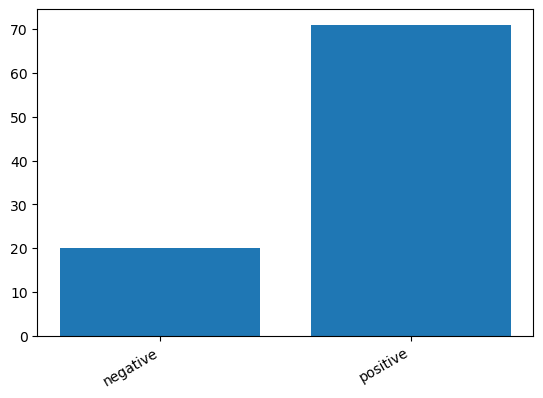

In [64]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.bar(['negative','positive'],[scores['negative'][0],scores['positive'][0]])
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()